In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
params = {
    "M": 10,
    "tau_rec": 10,
    "alpha": 1,
    "N": 1000,
    "Nh": 1000,
    }

In [6]:
def HGT(t, params, HGT_type):
    dt = 1

    if HGT_type == 0:
        to_integrate = [HGT1_integrand(t, t_int, params) for t_int in np.arange(0, t, dt)]
    if HGT_type == 1:
        to_integrate = [HGT2_integrand(t, t_int, params) for t_int in np.arange(0, t, dt)]
    else: 
        raise ValueError()
    integral = np.sum(to_integrate)*dt
    return integral



def HGT1_integrand(t, t_int, params):
    N = params["N"]
    M = params["M"]
    Nh = params["Nh"]

    tau = M*Nh/N
    tau_rec = params["tau_rec"]
    alpha = params["alpha"]
    first_exp = np.exp(-1*(t-t_int)/tau)
    second_exp = (alpha/tau)*(np.exp(-1*(tau_rec-t_int)/tau) + np.exp((tau_rec-t)/tau))
    third_exp = (1-(alpha/tau_rec)*np.exp(-t_int/tau_rec))
    return (first_exp + second_exp)*(third_exp)*N

In [13]:
params = {
    "M": 10,
    "tau_rec": 1000,
    "alpha": 1,
    "N": 100,
    "Nh": 1000,
    }

t_range = np.arange(0, 100, 1)
HGT_res = [HGT1_integrand(t, 0, params) for t in t_range]

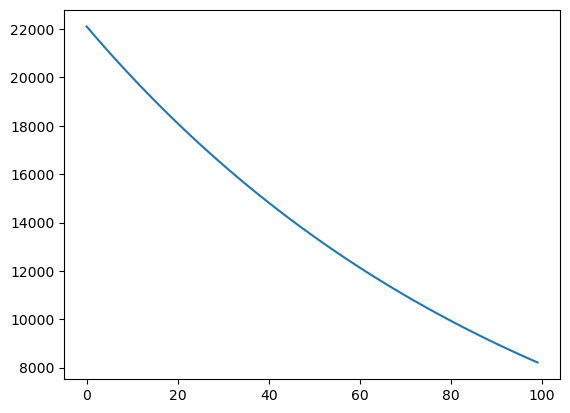

In [14]:
plt.plot(HGT_res)